1970년대 보스턴 지역의 주택 가격 예측 => 회귀

데이터 준비하기

In [ ]:
from tensorflow.keras.datasets.boston_housing import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

57344/57026 [==============================] - 0s 0us/step


데이터 형태 확인하기

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


데이터 전처리 및 검증 데이터셋 만들기

In [ ]:
import numpy as np
np.set_printoptions(suppress=True)

print(x_train[0])

[  0.25199   0.       10.59      0.        0.489     5.783    72.7
   4.3549    4.      277.       18.6     389.43     18.06   ]


In [ ]:
# 데이터 전처리 -> 표준화 (Standardization)

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

# 데이터(훈련, 테스트 데이터 모두) - 평균 / 표준편차 (Standardization)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

print(x_train[0])

[-0.40102395 -0.48033655 -0.12089418 -0.28828791 -0.58254176 -0.68137272
  0.11117586  0.26484408 -0.65187119 -0.80249043  0.0756568   0.37366783
  0.69211835]


In [ ]:
# 검증 데이터셋 만들기
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,
                                                  test_size=0.33,
                                                  random_state=777)

In [ ]:
print(x_train.shape, x_val.shape)

(270, 13) (134, 13)


모델 구성하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) #하나의 값을 출력 -> 주택가격

모델 설정하기

In [ ]:
model.compile(optimizer='adam',loss='mse', metrics=['mae','mse'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=300,
                    validation_data=(x_val,y_val)) # batch_size 64번 공부해라
                    # validation 쪽지시험 결과도 나옴

Epoch 1/300
9/9 [==============================] - 14s 59ms/step - loss: 564.2696 - mae: 22.0497 - mse: 564.2696 - val_loss: 595.2850 - val_mae: 22.1675 - val_mse: 595.2850
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 547.5419 - mae: 21.5580 - mse: 547.5419 - val_loss: 566.0613 - val_mae: 21.4927 - val_mse: 566.0613
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 487.7875 - mae: 20.4397 - mse: 487.7875 - val_loss: 534.8525 - val_mae: 20.7471 - val_mse: 534.8525
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 435.4178 - mae: 19.0542 - mse: 435.4178 - val_loss: 498.9540 - val_mae: 19.8760 - val_mse: 498.9540
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 413.6900 - mae: 18.3974 - mse: 413.6900 - val_loss: 457.2849 - val_mae: 18.8128 - val_mse: 457.2849
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 417.3907 - mae: 18.1862 - mse: 417.3907 - val_loss: 408.0130 - val_mae: 

모델 결과 그리기

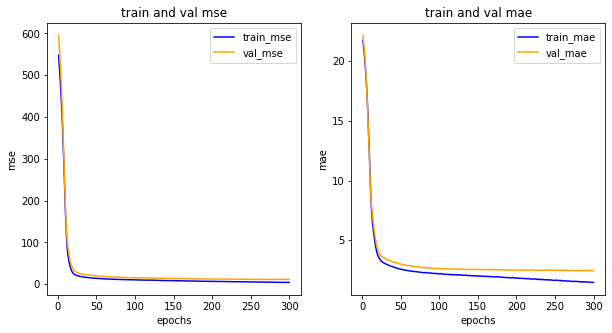

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()


모델 평가하기

In [ ]:
model.evaluate(x_test, y_test) # mae 2.0 -> 실제 집값과 2,000 달러정도 차이

4/4 [==============================] - 0s 3ms/step - loss: 8.9889 - mae: 2.1514 - mse: 8.9889


[8.988921165466309, 2.1513710021972656, 8.988921165466309]

모델 예측하기

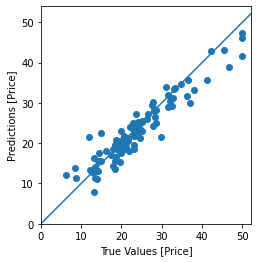

In [ ]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# 40달러 밑으로는 정확하게 예측하는 경향이 있으나 50달러에 가까워질수록 자주
# 틀리는 경향이 있음.
# mse 값이 가장 적은 모델을 사용해야 할것